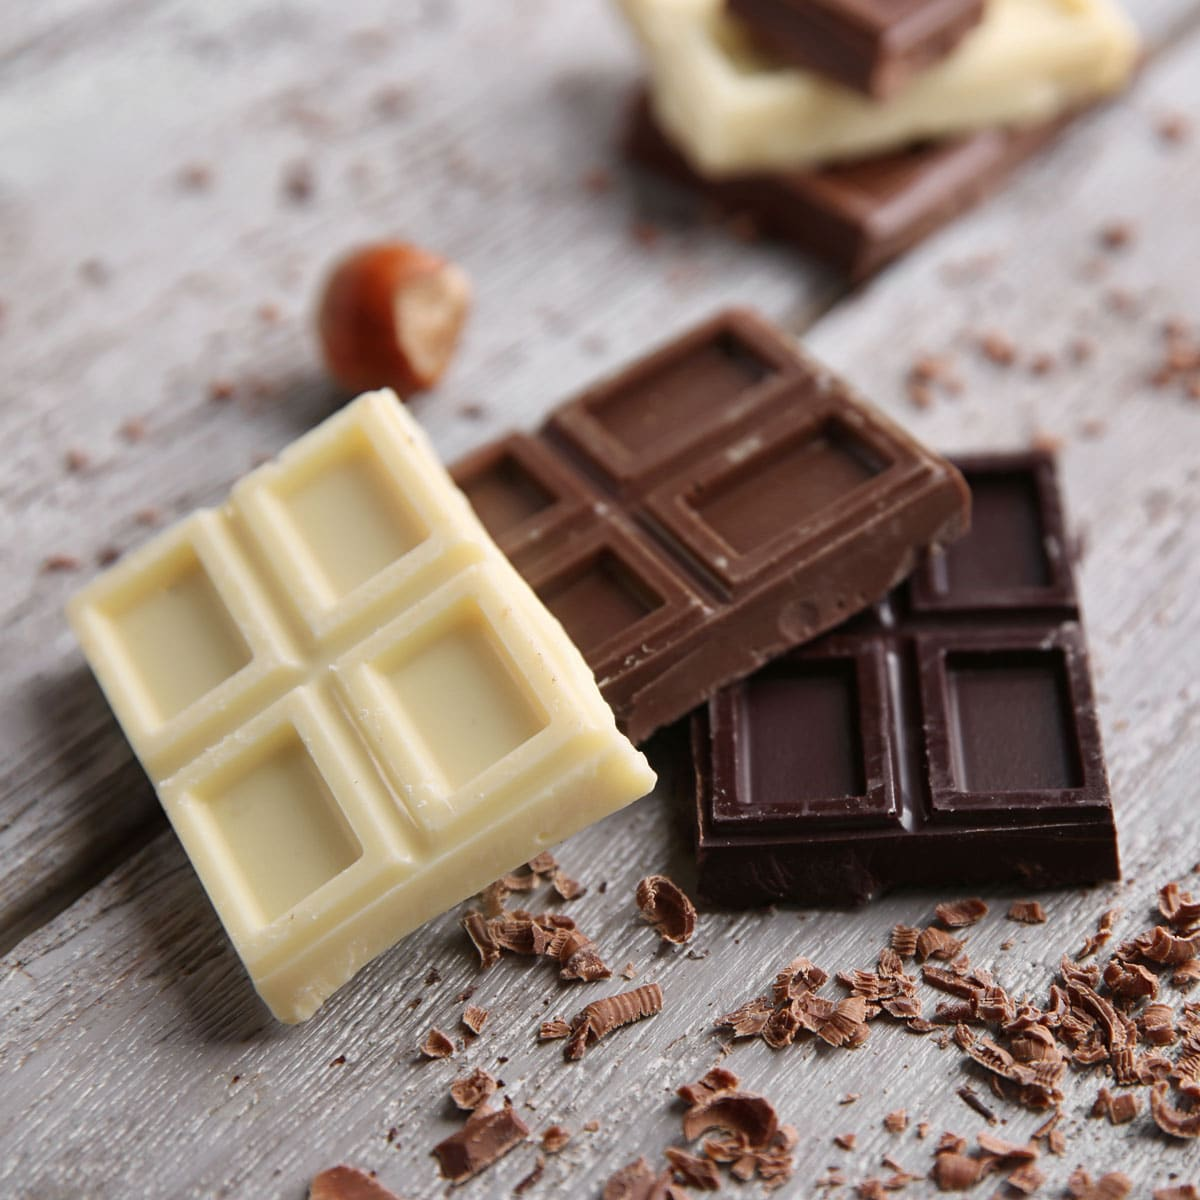
# Flavours of Cacao
## Table of contents
* [Introduction](#Introduction)
* [Read in the Data](#read_the_data)
* [Data Preparation](#data_preparation)
* [Exploratory Data Analysis](#EDA)
    * [Which country is the largest producer of chocolate?](#q1)
    * [How does the cocoa percentage in chocolates affect ratings?](#q2)
    * [How does the production of chocolate vary based on type (normal or dark)?](#q3)
    * [Which country has the highest ratings?](#q4)
    * [How does the cocoa percentage affect the ratings in different countries?](#q5)
    * [How did the ratings for different types of chocolates change over time?](#q6)
* [Conclusion](#conclusion)

# Introduction
For this project I have decided to work on the [Chocolate bar ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings/version/1) dataset found on Kaggle using the **CRISP-DM Process:** Cross-Industry Standard Process for Data Mining<br>
6 major phases : 
* Business understanding
* Data understanding
* Data preparation
* Modeling
* Evaluation
* Deployment.


Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

<br>**Flavors of Cacao Rating System:**
* 5= Elite (Transcending beyond the ordinary limits)
* 4= Premium (Superior flavor development, character and style)
* 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
* 2= Disappointing (Passable but contains at least one significant flaw)
* 1= Unpleasant (mostly unpalatable)

**REF-** A value linked to when the review was entered in the database. Higher = more recent.

**Acknowledgements**<br>
These ratings were compiled by Brady Brelinski, Founding Member of the Manhattan Chocolate Society. For up-to-date information, as well as additional content (including interviews with craft chocolate makers), please see his website: [Flavors of Cacao](http://flavorsofcacao.com/index.html)

<a id='read_the_data'></a>
# Read in the Data

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data

df = pd.read_csv('flavors_of_cacao.csv')
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
# check the shape of the dataset

df.shape

(1795, 9)

In [4]:
# check the columns

df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

<a id='data_preparation'></a>
## Data Preparation

In [5]:
# rename the columns

df.columns = ['Company', 'Specific Bean Origin or Bar Name', 'REF', 'Review Date', 'Cocoa Percentage', 
              'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin']

In [6]:
df.sample(10)

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percentage,Company Location,Rating,Bean Type,Broad Bean Origin
1164,Naive,Grenada,867,2012,71%,Lithuania,2.50,Trinitario,Grenada
316,Cacao Sampaka,"Xoconusco, Chiapas",346,2009,70%,Spain,4.00,Criollo,Mexico
198,Bittersweet Origins,"Bali, Singaraja",558,2010,65%,U.S.A.,2.75,,Indonesia
1654,Theo,Congo w/ nibs,903,2012,65%,U.S.A.,3.25,Forastero,Congo
289,Cacao de Origen,Chuao,1688,2015,77%,Venezuela,3.50,Trinitario,Venezuela
59,Amano,"Bali, Jembrana",304,2008,70%,U.S.A.,2.75,,Indonesia
1588,Sublime Origins,Moho Valley,1157,2013,78%,U.S.A.,3.25,Trinitario,Belize
1334,Pralus,Colombie,40,2006,75%,France,3.50,Trinitario,Colombia
1786,Zotter,El Ceibo Coop,879,2012,90%,Austria,3.25,,Bolivia
1475,Sjolinds,Nicaragua,1462,2015,72%,U.S.A.,3.00,,Nicaragua


In [7]:
# replace blank spaces with 'NaN'
# and check for null values

df = df.replace(r'^\s+$', np.nan, regex = True)
df.isnull().sum()

Company                               0
Specific Bean Origin or Bar Name      0
REF                                   0
Review Date                           0
Cocoa Percentage                      0
Company Location                      0
Rating                                0
Bean Type                           888
Broad Bean Origin                    74
dtype: int64

### As we can see there are not many null values in the dataset, but there are a lot of blank spaces in the 'Bean Type' and 'Broad Bean Origin' column <br>
### We can solve the missing values problem in the following ways:
### 1. Fill in the blank spaces with the mode(or mean in case of numerical category) value
### 2. Drop the column

In [8]:
# find the mode of 'Bean Type'

df['Bean Type'].value_counts()

Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Beniano                       3
EET                           3
Matina                        3
Criollo, Forastero            2
Amazon, ICS                   2
Trinitario, Forastero         2
Amazon mix                    2
Criollo (Amarru)              2
Criollo (Ocumare 61)          2
Nacional                      2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Forastero(Arriba, CCN)        1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         1
Forastero, Trinitario         1
Forastero (Arriba) ASSS       1
Criollo 

### Mode of 'Bean Type' column is **Trinitario**.<br>
### But if we replace all the 888 missing values in the column with Trinitario, it will effect our analysis, so the better option here is to drop the column.

In [9]:
df.drop(['Bean Type'], axis=1, inplace=True)

In [10]:
# check the values in the origin columns

df['Specific Bean Origin or Bar Name'].value_counts()

Madagascar                        57
Peru                              45
Ecuador                           42
Dominican Republic                37
Venezuela                         21
                                  ..
Conacado, #213, DR, -C             1
Sambirano Valley, #215, MR, MC     1
Chuao, #218, MR, MC                1
Chuao, #217, DR, MC                1
Brazil, Mitzi Blue                 1
Name: Specific Bean Origin or Bar Name, Length: 1039, dtype: int64

In [11]:
df['Broad Bean Origin'].value_counts()

Venezuela                214
Ecuador                  193
Peru                     165
Madagascar               145
Dominican Republic       141
                        ... 
Peru, Belize               1
Peru, Mad., Dom. Rep.      1
PNG, Vanuatu, Mad          1
Trinidad, Ecuador          1
Venezuela, Carribean       1
Name: Broad Bean Origin, Length: 99, dtype: int64

### As we can see 'Broad Bean Origin' and 'Specific Bean Origin or Bar Name' have almost the same categories and 'Broad Bean Origin' has a few missing values, we can drop the column.

In [12]:
df.drop(['Broad Bean Origin'], axis=1, inplace=True)

In [13]:
# convert the 'Cocoa Percentage' column to float

df['Cocoa Percentage'] = df['Cocoa Percentage'].apply(lambda x: float(x.strip('%')) / 100.0)

In [14]:
# create a new feature called 'Chocolate Type' using the 'Cocoa Percentage' column

df['Chocolate Type'] = df['Cocoa Percentage'].apply(lambda x: 'dark' if x>=0.7 else 'normal' if x>0.0 else 'white')

In [15]:
# check the different categories in 'Company Location'

df['Company Location'].value_counts()

U.S.A.               764
France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
Brazil                17
Peru                  17
Madagascar            17
New Zealand           17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Israel                 9
Costa Rica             9
Argentina              9
Poland                 8
Lithuania              6
Honduras               6
South Korea            5
Nicaragua              5
Sweden                 5
Domincan Republic      5
Ireland                4
Netherlands            4
Fiji                   4
Sao Tome               4
Puerto Rico            4
Mexico                 4


In [16]:
# make a list of top 10 locations

top_location = list(df['Company Location'].value_counts()[:9].index)
top_location

['U.S.A.',
 'France',
 'Canada',
 'U.K.',
 'Italy',
 'Ecuador',
 'Australia',
 'Belgium',
 'Switzerland']

In [17]:
# leaving out the top 10 locations change all the other locations to 'Other', as there are a lot of locations 
# and it would be hard to visualize them 

df['Company Location'] = df['Company Location'].apply(lambda x: x if x in top_location else 'Other')

In [18]:
df.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percentage,Company Location,Rating,Chocolate Type
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,normal
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,dark
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,dark
3,A. Morin,Akata,1680,2015,0.70,France,3.50,dark
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,dark


<a id='EDA'></a>
# Exploratory Data Analysis
<a id='q1'></a>
# Question 1 - Which country is the largest producer of chocolate?

<AxesSubplot:xlabel='count', ylabel='Company Location'>

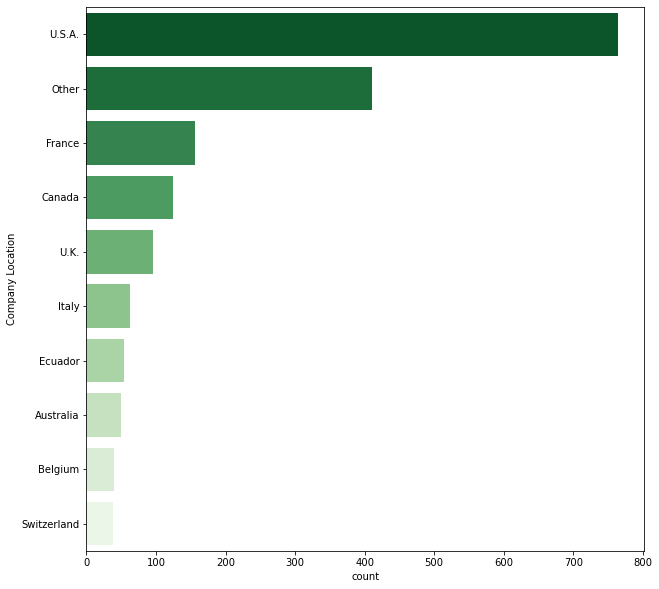

In [19]:
freq = df['Company Location'].value_counts()
gen_order = freq.index

plt.figure(figsize=(10,10))
sns.countplot(y='Company Location', data=df, palette='Greens_r', order=gen_order)

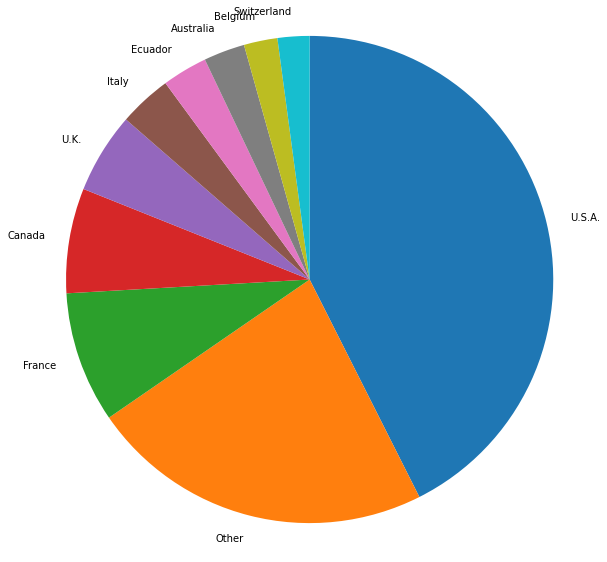

In [20]:
plt.figure(figsize=(10,10))

sorted_counts = df['Company Location'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

## The U.S.A is the largest producer of chocolate globally, followed by France and Canada, respectively.

<a id='q2'></a>
# Question 2-  How does the cocoa percentage in chocolates affect ratings?

<AxesSubplot:xlabel='Cocoa Percentage', ylabel='Rating'>

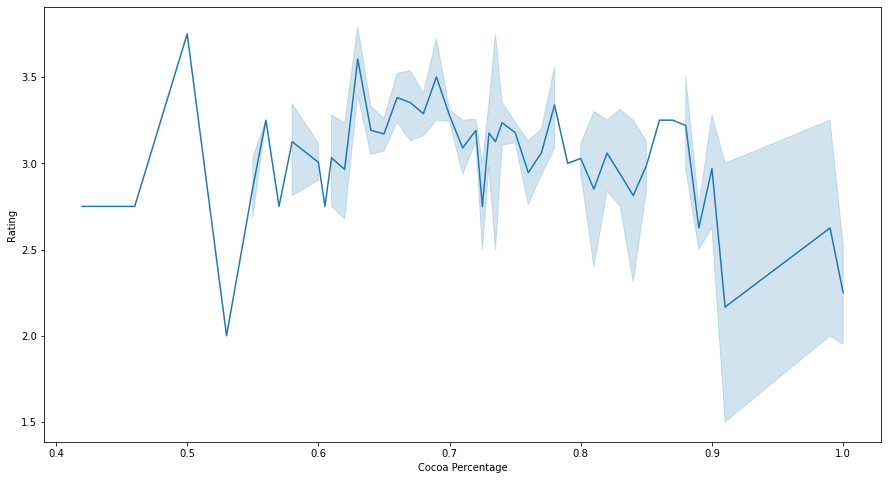

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Cocoa Percentage', y='Rating', data=df)

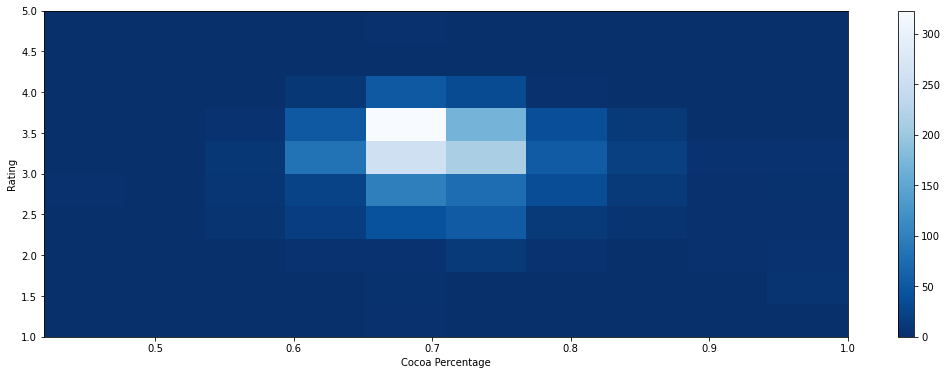

In [22]:
plt.figure(figsize = [18, 6])
# plt.subplot(1, 2, 2)
plt.hist2d(data = df, x = 'Cocoa Percentage', y = 'Rating', cmap='Blues_r')
plt.colorbar()
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating');


## 65- 70% of cocoa has the most number of ratings, 3.5 being the average for this percentage, this is also the only range that has ratings higher than 4.5.

<a id='q3'></a>
# Question 3- How does the production of chocolate vary based on type (normal or dark)?

<AxesSubplot:xlabel='Company Location', ylabel='count'>

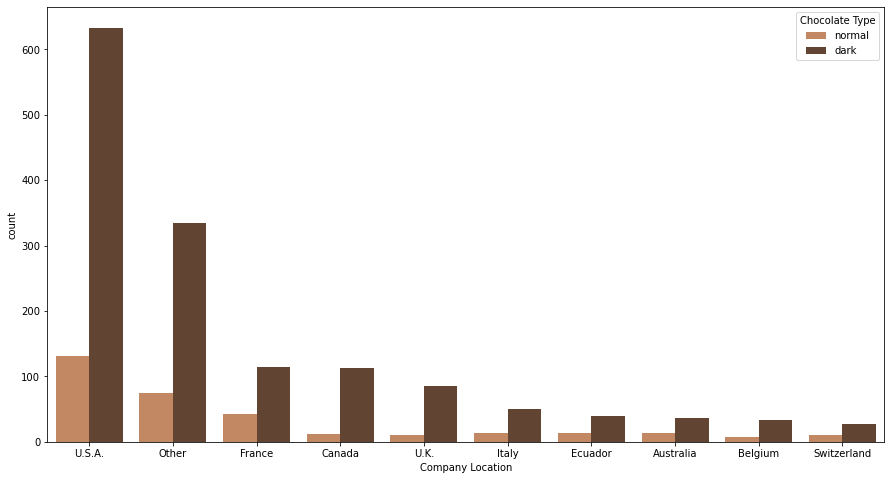

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Company Location'], hue = 'Chocolate Type', palette = 'copper_r', order=gen_order)

## the production of dark chocolate is more than that of normal chocolate everywhere. Belgium is the smallest producer of normal chocolate and the U.S.A is the largest producer of normal as well as dark chocolate.

<a id='q4'></a>
# Question 4- Which country has the highest chocolate ratings?

<Figure size 1080x1080 with 0 Axes>

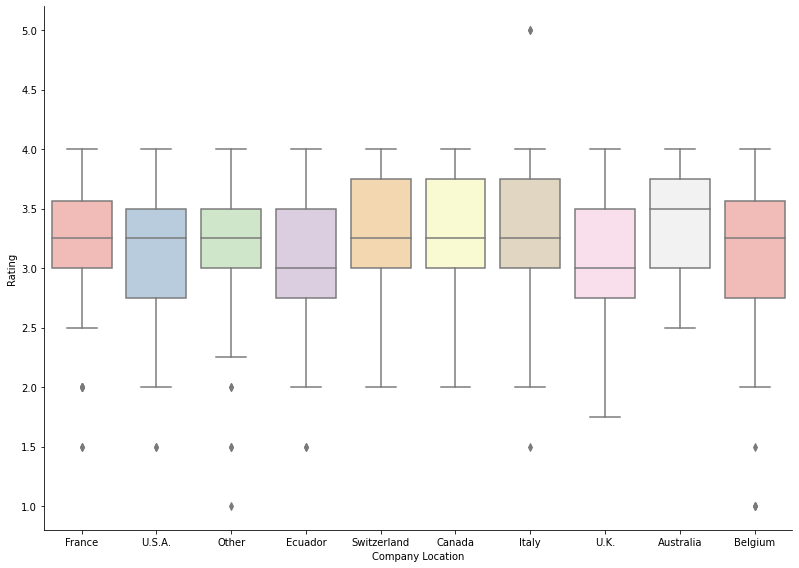

In [24]:
plt.figure(figsize=(15,15))
sns.catplot(data=df, x='Company Location', y='Rating', palette = 'Pastel1', kind="box",height=8, aspect=1.4)


## Australia has the highest median rating of 3.5.

<a id='q5'></a>
# Question 5- How does the cocoa percentage affect the ratings in different countries?

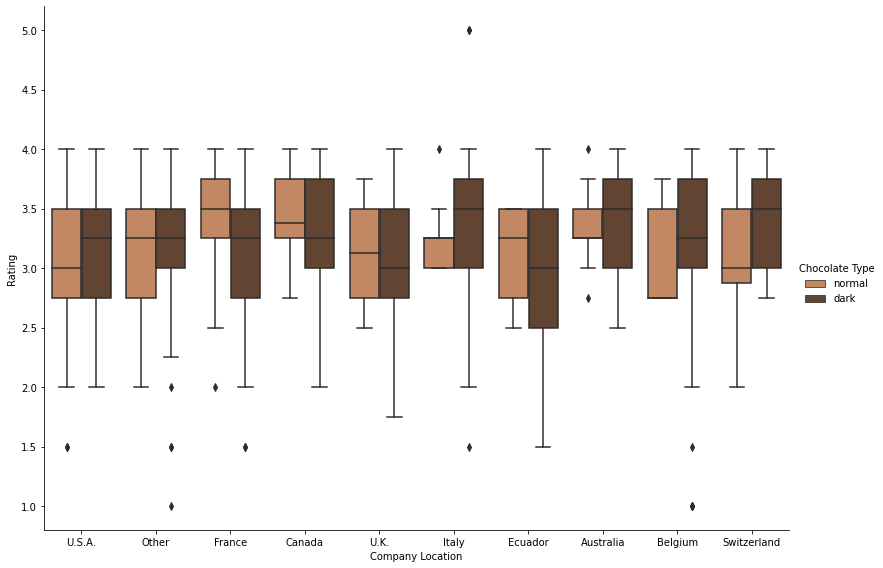

In [25]:
sns.catplot(data=df, x='Company Location', y='Rating', palette = 'copper_r', hue='Chocolate Type', kind="box",
            height=8, aspect=1.4, order=gen_order)

## Italy, Australia, and Switzerland have the best ratings for dark chocolate and Canada and Ecuador for normal chocolate. Italy is the only country with ratings higher than 4 and it's for dark chocolate

<a id='q6'></a>
# Question 6- How did the ratings for different types of chocolates change over time?

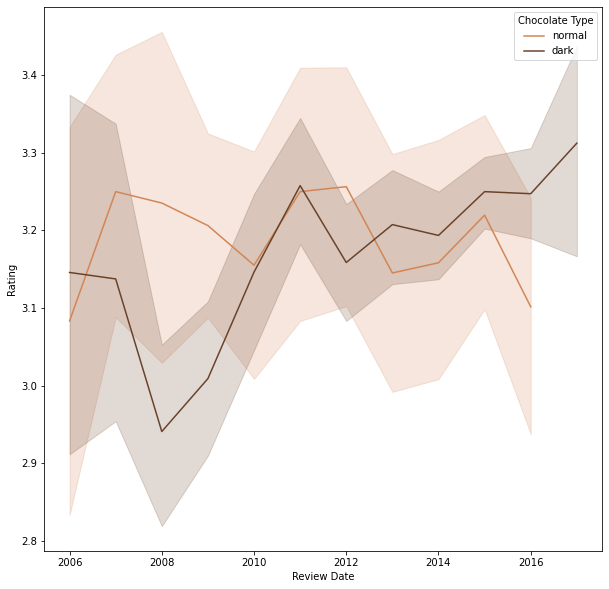

In [26]:
# sns.relplot(x="Review Date", y="Rating", hue="Chocolate Type", kind="line", data=df);
plt.figure(figsize=(10,10))
palette = sns.color_palette("mako_r", 2)

sns.lineplot(data=df, x="Review Date", y="Rating", hue="Chocolate Type", palette='copper_r'
#hue="Company Location"
            );

## As we can see in the line plot, the liking for dark chocolate has increased over the years whereas it's the same for normal chocolate.

<AxesSubplot:>

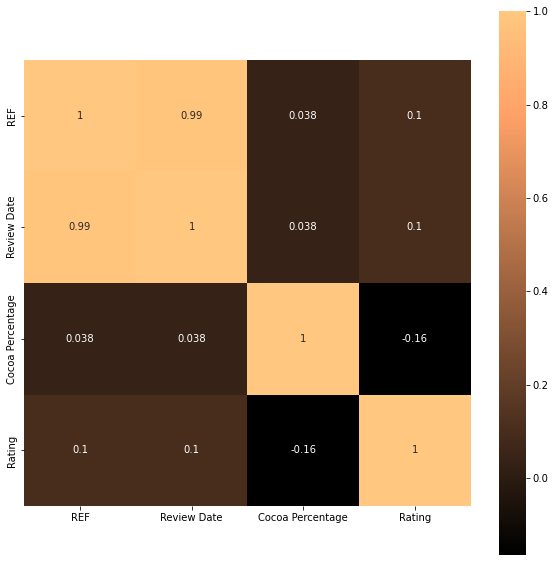

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square=True, cmap='copper', annot=True)

<a id='conclusion'></a>
# Conclusion
* The U.S.A is the largest producer of chocolate (dark as well as normal).
* 65–75% of cocoa in chocolates is the most preferred range.
* Australia has the highest median ratings (3.5), while U.K and Ecuador have the smallest (3).
* Italy, Australia, and Switzerland have the best ratings for dark chocolate, and Canada and Ecuador for normal chocolate.
* Italy is the only country with ratings higher than 4 and it's for dark chocolate.
* The liking for dark chocolate has increased over the years whereas it's the same for normal chocolate.